# Trabajo final

## Problema: 

Somos una empresa de desarrollo de software que quiere crear su próxima aplicación. Para esto, queremos resolver las siguientes preguntas: 

* ¿Cuál es la categoría donde se tiene mayor oportunidad de negocio dado que se pretende recibir algún tipo de ingreso, ya sea por medío de compra directa de la app, publicidad o compras internas dentro del aplicativo como una suscripción?

In [77]:
# importando librerias
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

## Descargando dataset

In [4]:
! wget -q -O Part1.csv.tar.gz https://github.com/gauthamp10/Google-Playstore-Dataset/blob/main/dataset/Part1.csv.tar.gz?raw=true
! wget -q -O Part2.csv.tar.gz https://github.com/gauthamp10/Google-Playstore-Dataset/blob/main/dataset/Part2.csv.tar.gz?raw=true
! wget -q -O Part3.csv.tar.gz https://github.com/gauthamp10/Google-Playstore-Dataset/blob/main/dataset/Part3.csv.tar.gz?raw=true

! for f in *.tar.gz; do tar -xvf "$f"; done
! cat Part?.csv > Googple-Playstore-Dataset.csv

!ls

Part1.csv
Part2.csv
Part3.csv
Googple-Playstore-Dataset.csv  Part2.csv	 Part3.csv.tar.gz
Part1.csv		       Part2.csv.tar.gz  sample_data
Part1.csv.tar.gz	       Part3.csv


In [22]:
playstore_dataset = pd.read_csv('Googple-Playstore-Dataset.csv')

In [25]:
playstore_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [27]:
playstore_dataset.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Limpieza de datos

In [119]:
na_ratio = ((playstore_dataset.isnull().sum() / len(playstore_dataset)) * 100).sort_values(ascending = False)
print(na_ratio)

Developer Website    32.894657
Privacy Policy       18.199879
Released              3.071972
Rating                0.989345
Rating Count          0.989345
Minimum Android       0.282324
Size                  0.008474
Currency              0.005837
Installs              0.004626
Minimum Installs      0.004626
Developer Id          0.001427
Developer Email       0.001340
App Name              0.000086
Editors Choice        0.000000
Price                 0.000000
Free                  0.000000
Maximum Installs      0.000000
Last Updated          0.000000
Content Rating        0.000000
Ad Supported          0.000000
In App Purchases      0.000000
Category              0.000000
App Id                0.000000
Scraped Time          0.000000
dtype: float64


Se eliminaran las variables que no aportarán inforamación para responder la pregunta de negocio planteada al inicio.

In [38]:
variables_eliminar = ['App Name', 'App Id', 'Developer Id', 'Developer Email', 'Developer Website', 'Privacy Policy'] 

In [39]:
playstore_dataset_clean = playstore_dataset.drop(variables_eliminar, axis=1)

In [40]:
playstore_dataset_clean.shape

(2312944, 18)

Como la aplicación que se desea desarrollar debe contar con algún método de financiación, se excluiran del análisis aquellas aplicaciones que son gratis, que no cobran por publicidad y que no tienen métodos de compra dentro del aplicativo.

In [41]:
all_free_condition = np.logical_and.reduce((playstore_dataset_clean['Free'], ~playstore_dataset_clean['Ad Supported'], ~playstore_dataset_clean['In App Purchases']))

playstore_dataset_clean = playstore_dataset_clean[~all_free_condition]
playstore_dataset_clean.shape

(1244395, 18)

### Analisis por categorias

In [42]:
categories = playstore_dataset_clean['Category'].unique()
playstore_dataset_clean['Category'].nunique()

48

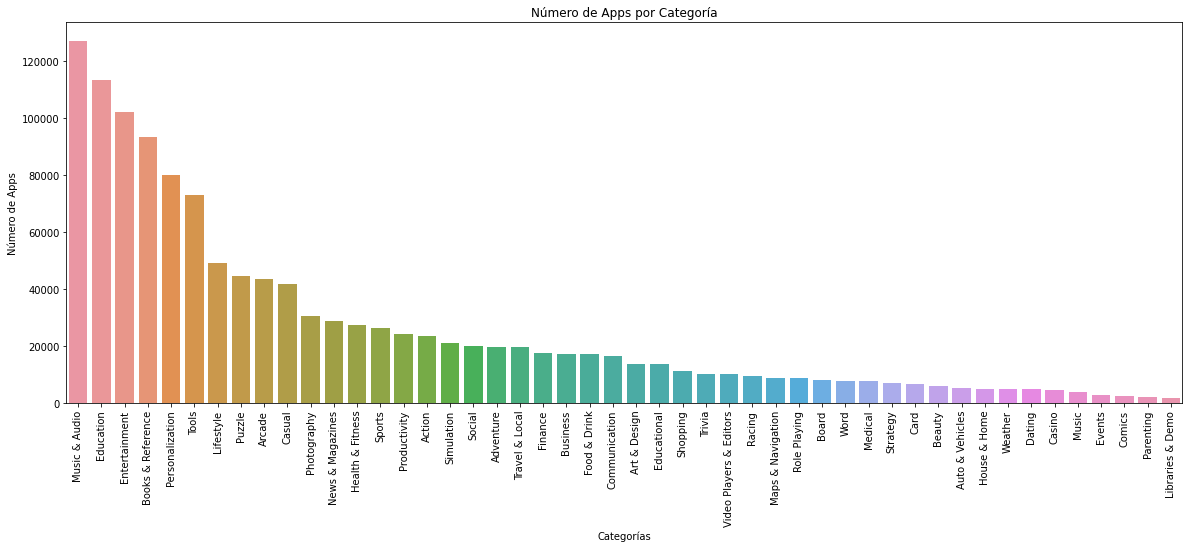

In [43]:
plt.figure(figsize=(20,7))
count_category = sns.countplot(x="Category", data=playstore_dataset_clean,order = playstore_dataset_clean['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Número de Apps por Categoría')
plt.ylabel('Número de Apps')
plt.xlabel('Categorías')
plt.show()

Las aplicaciones de Música & Audio, Educación, Entretenimiento, Libros & Referencias son las que más tienen oferta en la Play Store.

### Análisis de las instalaciones

In [45]:
playstore_dataset_clean['Installs'].nunique()

21

In [46]:
playstore_dataset_clean['Installs'].unique()

array(['5,000+', '10+', '50+', '1,000+', '50,000+', '10,000+', '1+',
       '500,000+', '100+', '500+', '100,000+', '10,000,000+', '5+',
       '1,000,000+', '5,000,000+', '100,000,000+', '0+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+'],
      dtype=object)

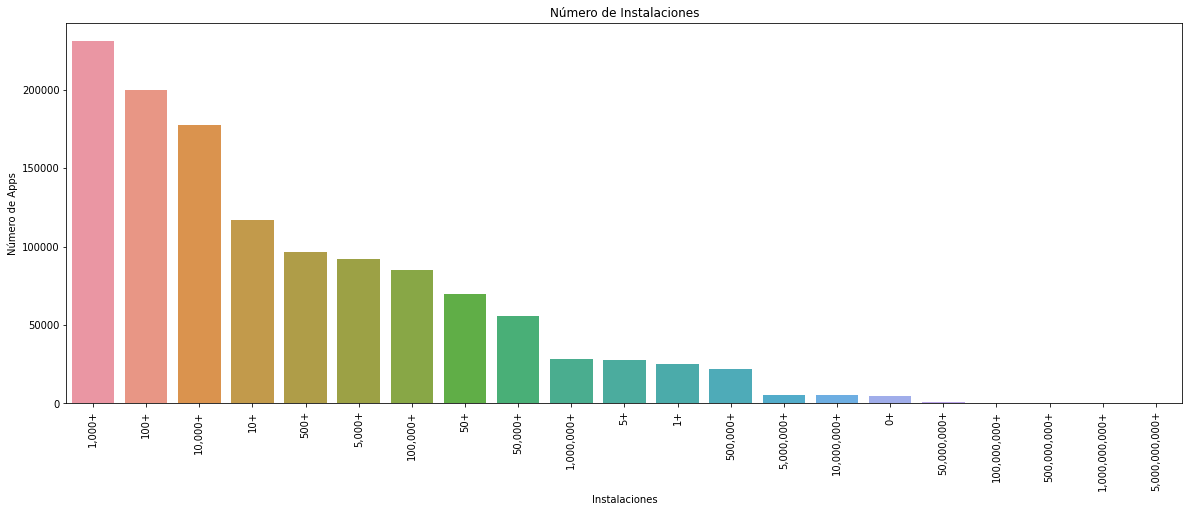

In [47]:
  plt.figure(figsize=(20,7))
  count_category = sns.countplot(x="Installs", data=playstore_dataset_clean,order = playstore_dataset_clean['Installs'].value_counts().index)
  plt.xticks(rotation=90)
  plt.title('Número de Instalaciones')
  plt.ylabel('Número de Apps')
  plt.xlabel('Instalaciones')
  plt.show()

De la gráfica anterior se puede concluir que mayoría de las aplicaciones presentan alrededor de 1000+, 100+ y 10000+ instalaciones.



In [57]:
avg_install_apps = playstore_dataset_clean.groupby(by='Category',as_index=False).agg({'Maximum Installs':'median'}).sort_values(by='Maximum Installs',ascending=False)

Para analizar el promedio de instalaciones por categoría, se tomará como estimador la mediana ya que hay aplicaciones como YouTube que introducen algún tipo de ruido.

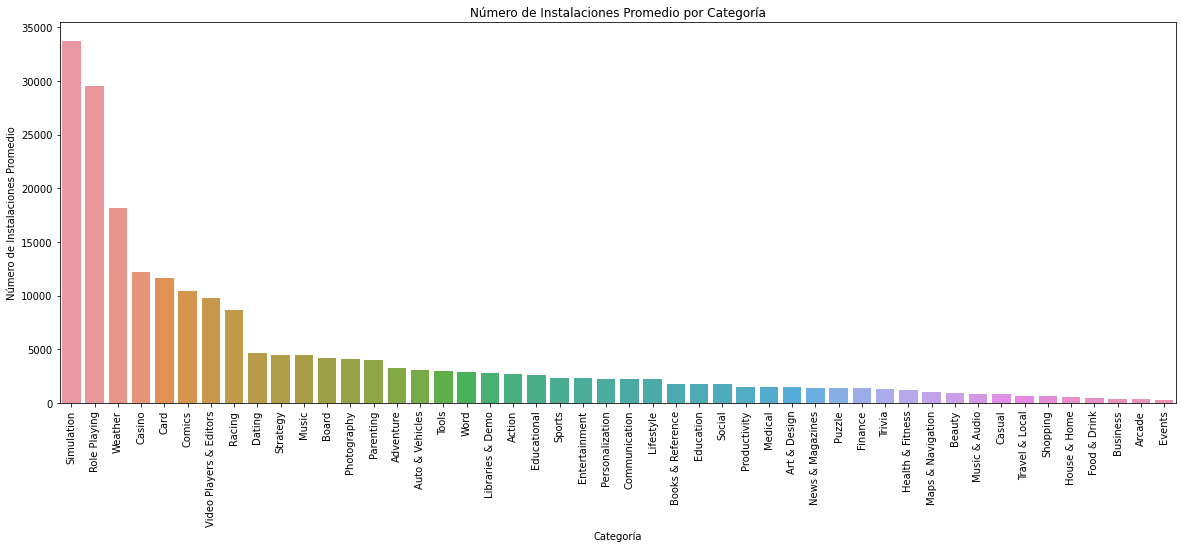

In [69]:
plt.figure(figsize=(20,7))
count_category = sns.barplot(x="Category",y='Maximum Installs', data=avg_install_apps)
plt.xticks(rotation=90)
plt.title('Número de Instalaciones Promedio por Categoría')
plt.ylabel('Número de Instalaciones Promedio')
plt.xlabel('Categoría')
plt.show()

Las aplicaciones con mayor promedio de instalación son las de Simulación, Juego de Rol y Clima.

In [75]:
playstore_dataset_clean

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
3,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
5,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,6.0 and up,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False,2021-06-15 20:19:35
6,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,USD,2.5M,4.1 and up,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False,2021-06-15 20:19:35
9,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,3.5M,4.1 and up,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312934,Education,0.0,0.0,5+,5.0,6,True,0.0,USD,3.6M,4.0 and up,"Jun 15, 2020","Aug 31, 2020",Everyone,True,False,False,2021-06-16 12:59:18
2312935,Personalization,0.0,0.0,"1,000+",1000.0,1302,True,0.0,USD,29M,4.1 and up,"Jul 19, 2018","Nov 13, 2019",Everyone,True,False,False,2021-06-16 12:59:18
2312938,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False,2021-06-16 12:59:18
2312942,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,2021-06-16 12:59:19


In [101]:
def released_parser(x):
  if x:
    return datetime.datetime.strptime(x, '%b %d, %Y')
  return None

playstore_dataset_clean['Released_date'] = playstore_dataset_clean['Released'].fillna('').apply(released_parser)
playstore_dataset_clean['Scraped Time_date'] = playstore_dataset_clean['Scraped Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [111]:
playstore_dataset_clean_dates = playstore_dataset_clean[~playstore_dataset_clean['Released_date'].isna()].copy()
playstore_dataset_clean_dates['diff_days'] = (playstore_dataset_clean_dates['Scraped Time_date'] - playstore_dataset_clean_dates['Released_date']).dt.days
playstore_dataset_clean_dates = playstore_dataset_clean_dates[playstore_dataset_clean_dates['diff_days'] != 0].copy()

In [112]:
playstore_dataset_clean_dates['install_by_days'] = playstore_dataset_clean_dates['Maximum Installs'] / playstore_dataset_clean_dates['diff_days']

In [117]:
avg_install_by_days = playstore_dataset_clean_dates.groupby(by='Category',as_index=False).agg({'install_by_days':'median'}).sort_values(by='install_by_days',ascending=False)

Para analizar el promedio diario de instalaciones por categoría, se tomará como estimador la mediana ya que hay aplicaciones como YouTube que introducen algún tipo de ruido.

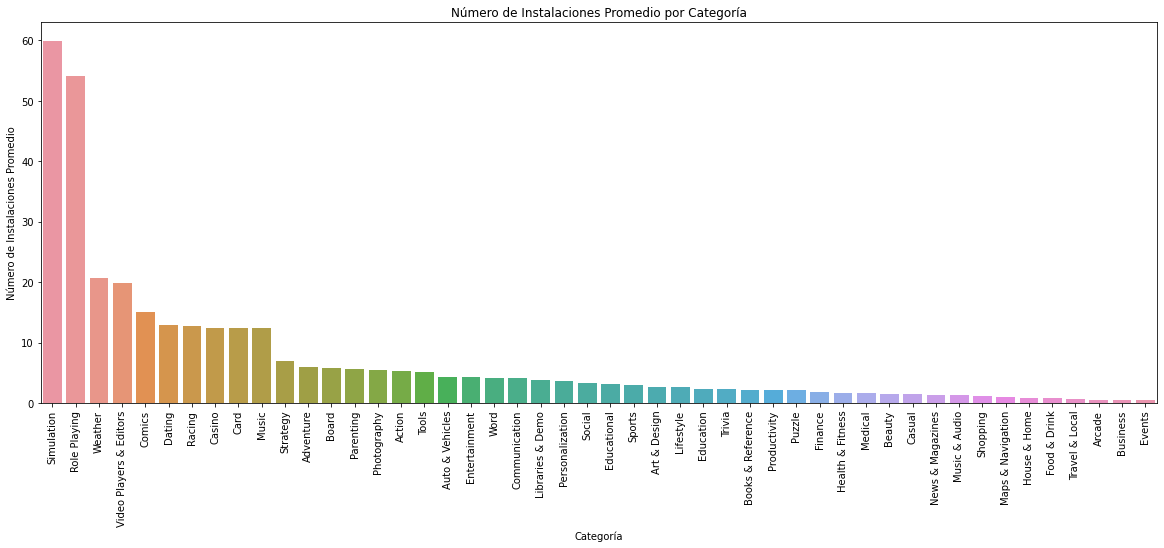

In [118]:
plt.figure(figsize=(20,7))
count_category = sns.barplot(x="Category",y='install_by_days', data=avg_install_by_days)
plt.xticks(rotation=90)
plt.title('Número de Instalaciones Promedio por Categoría')
plt.ylabel('Número de Instalaciones Promedio')
plt.xlabel('Categoría')
plt.show()

Como resultado de la exploración y análisis de datos, se puede concluir que la categorían en la que se debe desarrolar la nueva aplicación es Simulación, dado que:

* Es una categoría donde no hay mucha oferta, es decir, comparativamente no existen muchas aplicaciones que desarrollen este tipo de programas.
* Es una categoría, donde se da un alto volumen de instalaciones por día.
* La categoría simulación es muy amplia por lo que da gran capacidad de maniobra a la hora de proponer la implementación de una app con estas características.